# SpeakSense - Language Detection System (Machine Learning CSCI 6364)

**Abde Manaaf Ghadiali (G29583342), Gehna Ahuja (G35741419), Venkatesh Shanmugam (G27887303)**

The objective of this project is to develop a robust and accurate system capable of detecting the language spoken in audio recordings. By leveraging advanced machine learning algorithms and signal processing techniques, the system aims to accurately identify the language spoken in various audio inputs, spanning diverse accents, dialects, and environmental conditions. This language detection solution seeks to provide practical applications in speech recognition, transcription, translation, and other fields requiring language-specific processing, thereby enhancing accessibility and usability across linguistic boundaries.

This code sets up an environment for working with audio data, particularly focusing on Indian languages. Here's a breakdown of what each part does:

1. **Importing Libraries**: Imports necessary libraries for data manipulation, visualization, machine learning, and audio processing.

2. **Setting Display Options and Suppressing Warnings**: Configures display options for Pandas and suppresses warnings.

3. **Setting Random Seed**: Sets a random seed for reproducibility.

4. **Downloading Datasets**: Checks if the necessary datasets are downloaded, and if not, downloads them from Kaggle using the OpenDatasets library and organizes them into appropriate directories.

5. **Audio Data Processing**: Prepares the audio data for further analysis. This might include feature extraction, preprocessing, and organizing the data for training machine learning models.

6. **Machine Learning**: Utilizes machine learning techniques for tasks such as spoken language identification. This involves splitting the data into training and testing sets, building machine learning models (such as Random Forest or Gradient Boosting), evaluating the models, and generating classification reports and confusion matrices.

7. **Deep Learning**: Utilizes deep learning techniques, specifically convolutional neural networks (CNNs), for tasks such as spoken language identification. This involves building and training deep learning models using the TensorFlow and Keras libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, BatchNormalization, Input, AveragePooling2D, Conv1D, AveragePooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger
from tensorflow.keras.preprocessing import image_dataset_from_directory

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
np.random.seed(42)

# Model Training

### Classical ML Models

In [2]:
mfcc_feature_mean_dataframe = pd.read_parquet('../data/model_data/mfcc_feature_mean_dataframe_v1.parquet')
mfcc_feature_mean_dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,language_label
0,-319.48149,138.72615,6.45936,26.31299,5.61088,2.69325,-3.26227,2.70773,-12.87127,-2.70114,2.01327,-9.90734,-1.97162,-0.27848,-2.72113,-0.90446,-5.29428,1.57589,-6.68405,-2.33798,-3.20037,-5.06774,-5.79677,-2.19056,-2.46234,-3.59199,-3.33128,-2.18674,-2.72731,-0.88563,-2.70048,-1.48402,-2.53765,-1.41262,-0.85072,-1.95000,-3.69266,0.37067,-2.48831,-1.45433,0.06395,2656.30296,1.99743,0.04271,4.78917,0.32243,0.30395,0.27543,0.31334,0.34229,0.35033,0.36856,0.45764,0.55614,0.46778,0.50163,0.40531,15.27489,bengali
1,-352.18099,93.01355,12.44752,22.35018,3.68925,-3.80985,8.13166,-3.75855,-12.28694,0.64600,-13.07418,-8.26351,-3.16275,-3.84758,-1.62892,-5.50312,-3.33671,2.32125,-2.80197,2.25268,0.58417,-1.20634,-4.16561,-0.42712,0.59165,1.55856,-3.14931,-0.09178,-5.00616,-0.99386,-3.09864,-1.04177,-5.87610,-2.71012,-2.81588,-1.28303,-2.32042,-1.27830,-2.69054,-1.70799,0.08793,3680.65392,1.91039,0.03104,4.53195,0.33222,0.32703,0.28142,0.23822,0.25157,0.33027,0.36657,0.38529,0.39914,0.36023,0.41075,0.38870,16.57586,bengali
2,-345.73942,105.37426,17.46526,22.32421,10.77667,-5.77134,2.48573,0.79047,-8.47031,2.48507,-16.57800,-4.62347,-5.63365,-5.04854,-1.30636,1.56395,-9.89610,2.55223,-3.68349,0.11440,-3.42494,0.66201,-4.57967,0.00743,-0.32917,0.95929,-1.19382,2.44922,-0.56069,0.56412,-1.76220,-1.58586,-2.93493,-2.07350,-3.66146,-2.64233,-4.53944,-0.55488,-2.86967,-1.18416,0.07526,3602.46491,2.09288,0.03527,4.46201,0.40272,0.39694,0.31743,0.25862,0.26161,0.26249,0.28653,0.36438,0.36145,0.36213,0.46595,0.45886,10.65213,bengali
3,-334.94547,104.77699,14.67687,13.08286,-6.98111,-10.65509,-2.30285,-0.34929,-12.00047,2.36902,-15.00057,-11.05889,-3.82345,-4.88657,-1.94162,-0.98606,-7.38978,-0.97450,-2.49954,-1.01473,1.37104,1.04410,-2.39395,1.24137,-2.11098,1.18540,-1.32738,1.57632,-2.65178,0.31456,-1.12956,-0.27059,-2.38752,-2.20350,-4.32468,-1.08516,-2.41454,0.39176,-2.06206,-2.61421,0.08020,3495.54831,2.04025,0.04973,4.65656,0.39386,0.38886,0.33462,0.31541,0.33174,0.32177,0.33573,0.38692,0.41106,0.42622,0.46244,0.40770,19.10844,bengali
4,-288.43189,116.40293,4.29310,28.08566,3.18966,0.94562,7.48958,2.97414,-5.73112,3.77338,-3.19665,-6.29100,-2.07263,-3.78098,0.49395,-3.82178,-6.37689,0.76227,-6.91124,-2.61897,-3.43924,-5.01770,-4.14604,-3.52254,-2.80034,-1.70982,-3.64821,-1.44696,-3.99070,-1.14417,-1.87446,-1.97897,-2.30542,-1.44627,-2.98764,-1.21012,-0.94208,-0.55597,-0.98351,-0.58732,0.06334,2931.96294,2.11289,0.07503,4.84874,0.45893,0.38133,0.33183,0.33066,0.36587,0.38513,0.40789,0.44911,0.49105,0.49144,0.58597,0.51495,22.89081,bengali
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,-311.22448,128.04075,24.84714,19.78962,-5.77423,-8.45773,-15.05567,-9.68063,-11.72386,-16.70069,-7.60237,-2.55557,-12.32847,-3.64285,-5.25835,-2.30613,-4.07133,-8.52404,-4.51320,-8.72395,-8.23548,-2.92575,-8.37439,-2.60732,-4.86875,-6.82737,-3.58106,-3.47613,-2.74481,-3.07458,-3.22599,-0.78877,-3.95912,-1.65812,-1.38376,0.45779,1.03411,0.84503,-0.52650,1.07390,0.07337,2701.26789,1.86982,0.06376,4.56754,0.38662,0.39759,0.38157,0.41104,0.39804,0.33355,0.33086,0.31780,0.37813,0.35157,0.34254,0.34966,11.27950,urdu
47996,-356.29030,107.28558,22.48858,31.96166,15.19257,7.57151,9.84879,3.96813,-1.69552,5.44254,-3.41859,7.32096,1.70693,3.12525,3.88192,0.86123,-1.01182,4.10788,-3.87451,-0.19399,-0.70533,-0.93917,-1.03330,-0.01127,-3.10067,0.45493,-2.46598,0.50818,-3.30159,0.32681,-1.60081,-0.24235,-0.54288,-0.00092,-0.86177,-1.32798,0.13259,-0.26865,-0.80862,2.15391,0.03944,2535.67206,1.84071,0.05264,3.53457,0.45264,0.44399,0.45819,0.46304,0.49539,0.46569,0.44531,0.41793,0.44522,0.48710,0.45209,0.4

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    mfcc_feature_mean_dataframe, mfcc_feature_mean_dataframe['language_label'], stratify=mfcc_feature_mean_dataframe['language_label'], test_size=0.05, random_state=42)

X_train = X_train.drop(columns=['language_label']).reset_index(drop=True).values
X_test = X_test.drop(columns=['language_label']).reset_index(drop=True).values

print(f'\nTrain Shape: {X_train.shape}, Test Shape: {X_test.shape}')

language_labels_cols = list(pd.get_dummies(y_train, dtype=np.int32).columns.values)

X_train, X_test = X_train.reshape(-1, 58), X_test.reshape(-1, 58)

y_train, y_test = (pd.factorize(y_train)[0],
                          pd.factorize(y_test)[0])

print(f'Train Shape: {X_train.shape}, Test Shape: {X_test.shape}')
print(f'Target: Train Shape: {y_train.shape}, Test Shape: {y_test.shape}')


Train Shape: (45600, 58), Test Shape: (2400, 58)
Train Shape: (45600, 58), Test Shape: (2400, 58)
Target: Train Shape: (45600,), Test Shape: (2400,)


In [4]:
scaler_object = StandardScaler()

X_train_scaled = scaler_object.fit_transform(X_train)
X_test_scaled = scaler_object.fit_transform(X_test)

In [5]:
X_train

array([[-2.9649274e+02,  1.0169015e+02,  4.3906200e+00, ...,
         3.6629000e-01,  3.5758000e-01,  2.9543580e+01],
       [-2.9007509e+02,  1.2241469e+02, -1.3161100e+00, ...,
         5.5892000e-01,  5.1323000e-01,  1.0541380e+01],
       [-4.2081263e+02,  8.9006380e+01,  1.9741700e+01, ...,
         3.7571000e-01,  4.2042000e-01,  1.3878690e+01],
       ...,
       [-2.1540376e+02,  1.1370716e+02,  5.8952100e+00, ...,
         4.4577000e-01,  4.4920000e-01,  2.3051020e+01],
       [-3.2764227e+02,  1.6323593e+02,  1.6815000e+01, ...,
         5.2179000e-01,  4.7493000e-01,  3.3253200e+00],
       [-3.3332572e+02,  6.5262390e+01,  1.7349560e+01, ...,
         2.6551000e-01,  3.1712000e-01,  2.6253990e+01]])

In [6]:
X_train_scaled

array([[ 0.36918328, -0.20504355,  0.39490114, ..., -0.13450817,
        -0.2172951 ,  0.40469267],
       [ 0.47280226,  0.68067577,  0.18207623, ...,  1.99157637,
         1.56227396, -0.71172413],
       [-1.63807804, -0.74711881,  0.96739926, ..., -0.0305383 ,
         0.50116375, -0.51565058],
       ...,
       [ 1.67844097,  0.3085359 ,  0.45101282, ...,  0.74272382,
         0.83020967,  0.02324194],
       [-0.13375512,  2.42528198,  0.85825187, ...,  1.58176731,
         1.1243845 , -1.13568192],
       [-0.22551976, -1.7618825 ,  0.87818758, ..., -1.24683128,
        -0.67988015,  0.21142276]])

In [7]:
print('Training RFC, GBC and SVC on Unscaled Data!')
rfc_model = RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42).fit(X=X_train, y=y_train)
gbc_model = GradientBoostingClassifier(n_estimators=20, random_state=42).fit(X=X_train, y=y_train)
svc_model = SVC(probability=True, decision_function_shape='ovr', random_state=42).fit(X=X_train, y=y_train)

print('Training RFC, GBC and SVC on Scaled Data!')
rfc_model_scaled = RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42).fit(X=X_train_scaled, y=y_train)
gbc_model_scaled = GradientBoostingClassifier(n_estimators=20, random_state=42).fit(X=X_train_scaled, y=y_train)
svc_model_scaled = SVC(probability=True, decision_function_shape='ovr', random_state=42).fit(X=X_train_scaled, y=y_train)

Training RFC, GBC and SVC on Unscaled Data!
Training RFC, GBC and SVC on Scaled Data!


In [8]:
print(rfc_model.score(X_train, y_train))
print(gbc_model.score(X_train, y_train))
print(svc_model.score(X_train, y_train))

print(rfc_model_scaled.score(X_train_scaled, y_train))
print(gbc_model_scaled.score(X_train_scaled, y_train))
print(svc_model_scaled.score(X_train_scaled, y_train))

0.9999780701754386
0.8428508771929825
0.47717105263157894
0.9999780701754386
0.8428508771929825
0.9901535087719299


In [9]:
print(rfc_model.score(X_test, y_test))
print(gbc_model.score(X_test, y_test))
print(svc_model.score(X_test, y_test))

print(rfc_model_scaled.score(X_test_scaled, y_test))
print(gbc_model_scaled.score(X_test_scaled, y_test))
print(svc_model_scaled.score(X_test_scaled, y_test))

0.16875
0.1525
0.12666666666666668
0.16958333333333334
0.15416666666666667
0.16583333333333333


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

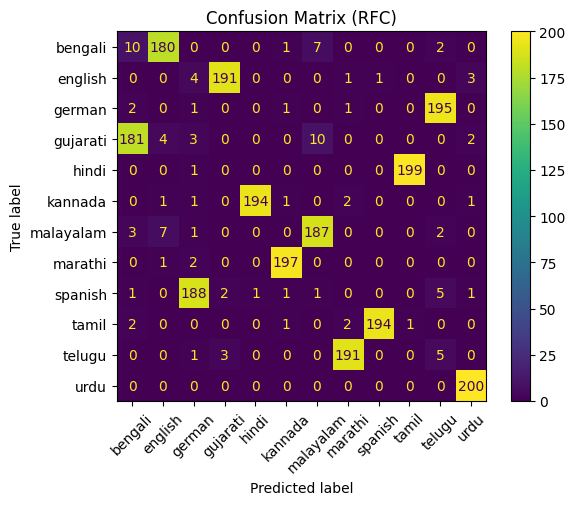

In [10]:
confusion_matrix_data = confusion_matrix(y_test, rfc_model.predict(X_test))

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix (RFC)')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

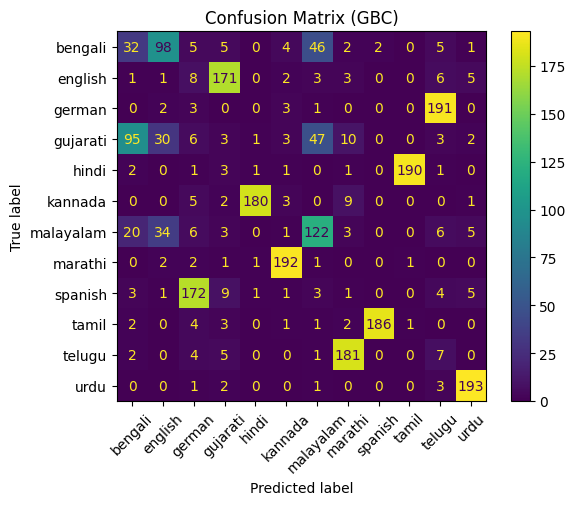

In [11]:
confusion_matrix_data = confusion_matrix(y_test, gbc_model.predict(X_test))

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix (GBC)')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

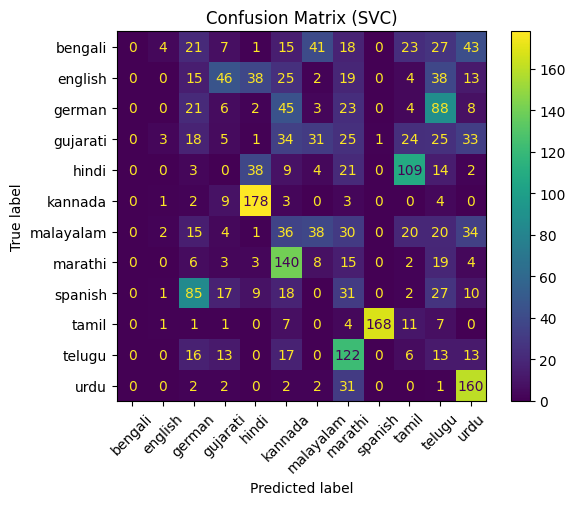

In [12]:
confusion_matrix_data = confusion_matrix(y_test, svc_model.predict(X_test))

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix (SVC)')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

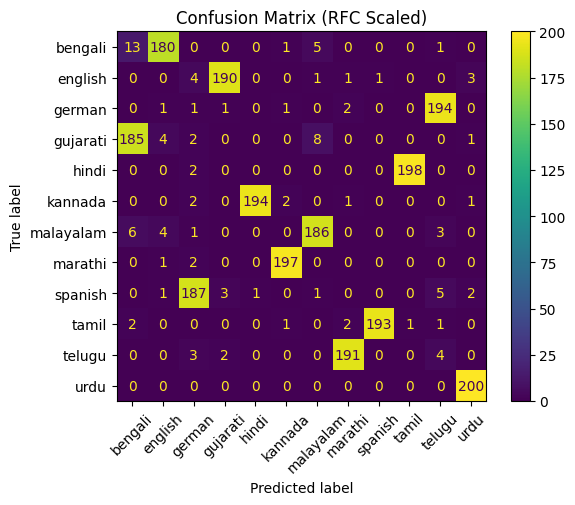

In [13]:
confusion_matrix_data = confusion_matrix(y_test, rfc_model_scaled.predict(X_test_scaled))

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix (RFC Scaled)')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

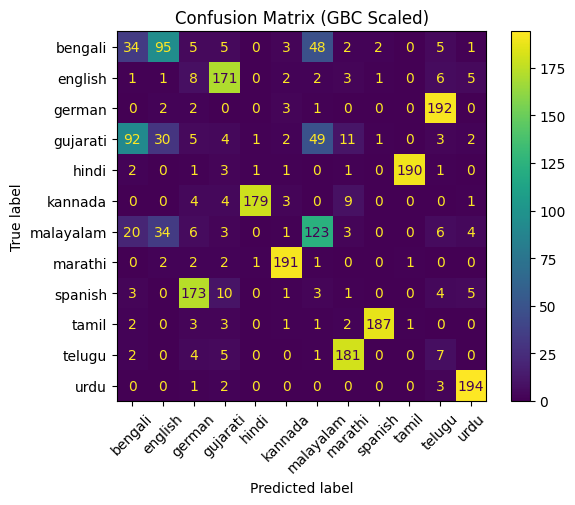

In [14]:
confusion_matrix_data = confusion_matrix(y_test, gbc_model_scaled.predict(X_test_scaled))

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix (GBC Scaled)')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

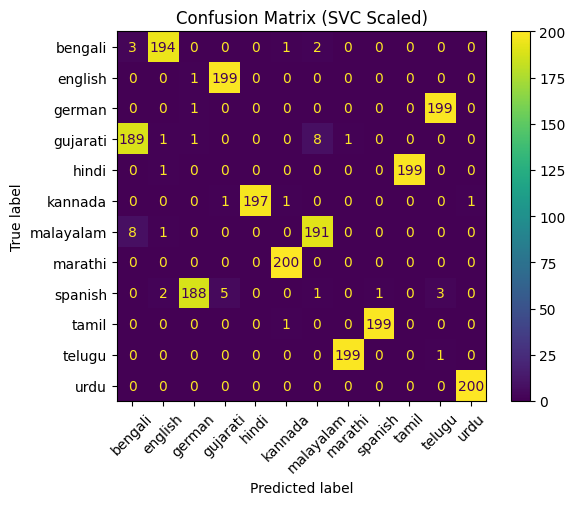

In [15]:
confusion_matrix_data = confusion_matrix(y_test, svc_model_scaled.predict(X_test_scaled))

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix (SVC Scaled)')
plt.xticks(rotation=45)

In [16]:
roc_auc_score(list(y_test), list(rfc_model.predict_proba(X_test)), multi_class='ovr', average='macro')

0.5733383522727272

In [17]:
roc_auc_score(list(y_test), list(gbc_model.predict_proba(X_test)), multi_class='ovr', average='macro')

0.5675568181818181

In [18]:
roc_auc_score(list(y_test), list(svc_model.predict_proba(X_test)), multi_class='ovr', average='macro')

0.5656113636363637

In [19]:
roc_auc_score(list(y_test), list(rfc_model_scaled.predict_proba(X_test_scaled)), multi_class='ovr', average='macro')

0.5758061553030303

In [20]:
roc_auc_score(list(y_test), list(gbc_model_scaled.predict_proba(X_test_scaled)), multi_class='ovr', average='macro')

0.5670346590909091

In [21]:
roc_auc_score(list(y_test), list(svc_model_scaled.predict_proba(X_test_scaled)), multi_class='ovr', average='macro')

0.5527017045454544

In [22]:
print(classification_report(y_test, rfc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.05      0.05      0.05       200
           1       0.00      0.00      0.00       200
           2       0.00      0.01      0.00       200
           3       0.00      0.00      0.00       200
           4       0.00      0.00      0.00       200
           5       0.00      0.01      0.00       200
           6       0.91      0.94      0.92       200
           7       0.00      0.00      0.00       200
           8       0.00      0.00      0.00       200
           9       0.01      0.01      0.01       200
          10       0.02      0.03      0.02       200
          11       0.97      1.00      0.98       200

    accuracy                           0.17      2400
   macro avg       0.16      0.17      0.17      2400
weighted avg       0.16      0.17      0.17      2400



In [23]:
print(classification_report(y_test, gbc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.20      0.16      0.18       200
           1       0.01      0.01      0.01       200
           2       0.01      0.01      0.01       200
           3       0.01      0.01      0.01       200
           4       0.01      0.01      0.01       200
           5       0.01      0.01      0.01       200
           6       0.54      0.61      0.57       200
           7       0.00      0.00      0.00       200
           8       0.00      0.00      0.00       200
           9       0.01      0.01      0.01       200
          10       0.03      0.04      0.03       200
          11       0.91      0.96      0.94       200

    accuracy                           0.15      2400
   macro avg       0.15      0.15      0.15      2400
weighted avg       0.15      0.15      0.15      2400



In [24]:
print(classification_report(y_test, svc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.00      0.00      0.00       200
           2       0.10      0.10      0.10       200
           3       0.04      0.03      0.03       200
           4       0.14      0.19      0.16       200
           5       0.01      0.01      0.01       200
           6       0.29      0.19      0.23       200
           7       0.04      0.07      0.06       200
           8       0.00      0.00      0.00       200
           9       0.05      0.06      0.05       200
          10       0.05      0.07      0.05       200
          11       0.50      0.80      0.62       200

    accuracy                           0.13      2400
   macro avg       0.10      0.13      0.11      2400
weighted avg       0.10      0.13      0.11      2400



In [25]:
print(classification_report(y_test, rfc_model_scaled.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.06      0.07      0.06       200
           1       0.00      0.00      0.00       200
           2       0.00      0.01      0.00       200
           3       0.00      0.00      0.00       200
           4       0.00      0.00      0.00       200
           5       0.01      0.01      0.01       200
           6       0.93      0.93      0.93       200
           7       0.00      0.00      0.00       200
           8       0.00      0.00      0.00       200
           9       0.01      0.01      0.01       200
          10       0.02      0.02      0.02       200
          11       0.97      1.00      0.98       200

    accuracy                           0.17      2400
   macro avg       0.17      0.17      0.17      2400
weighted avg       0.17      0.17      0.17      2400



In [26]:
print(classification_report(y_test, gbc_model_scaled.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.22      0.17      0.19       200
           1       0.01      0.01      0.01       200
           2       0.01      0.01      0.01       200
           3       0.02      0.02      0.02       200
           4       0.01      0.01      0.01       200
           5       0.01      0.01      0.01       200
           6       0.54      0.61      0.57       200
           7       0.00      0.00      0.00       200
           8       0.00      0.00      0.00       200
           9       0.01      0.01      0.01       200
          10       0.03      0.04      0.03       200
          11       0.92      0.97      0.94       200

    accuracy                           0.15      2400
   macro avg       0.15      0.15      0.15      2400
weighted avg       0.15      0.15      0.15      2400



In [27]:
print(classification_report(y_test, svc_model_scaled.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       200
           1       0.00      0.00      0.00       200
           2       0.01      0.01      0.01       200
           3       0.00      0.00      0.00       200
           4       0.00      0.00      0.00       200
           5       0.00      0.01      0.00       200
           6       0.95      0.95      0.95       200
           7       0.00      0.00      0.00       200
           8       0.01      0.01      0.01       200
           9       0.00      0.00      0.00       200
          10       0.00      0.01      0.00       200
          11       1.00      1.00      1.00       200

    accuracy                           0.17      2400
   macro avg       0.16      0.17      0.17      2400
weighted avg       0.16      0.17      0.17      2400



### Dense Model

In [28]:
mfcc_feature_mean_dataframe = pd.read_parquet('../data/model_data/mfcc_feature_mean_dataframe_v1.parquet')
mfcc_feature_mean_dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,language_label
0,-319.48149,138.72615,6.45936,26.31299,5.61088,2.69325,-3.26227,2.70773,-12.87127,-2.70114,2.01327,-9.90734,-1.97162,-0.27848,-2.72113,-0.90446,-5.29428,1.57589,-6.68405,-2.33798,-3.20037,-5.06774,-5.79677,-2.19056,-2.46234,-3.59199,-3.33128,-2.18674,-2.72731,-0.88563,-2.70048,-1.48402,-2.53765,-1.41262,-0.85072,-1.95000,-3.69266,0.37067,-2.48831,-1.45433,0.06395,2656.30296,1.99743,0.04271,4.78917,0.32243,0.30395,0.27543,0.31334,0.34229,0.35033,0.36856,0.45764,0.55614,0.46778,0.50163,0.40531,15.27489,bengali
1,-352.18099,93.01355,12.44752,22.35018,3.68925,-3.80985,8.13166,-3.75855,-12.28694,0.64600,-13.07418,-8.26351,-3.16275,-3.84758,-1.62892,-5.50312,-3.33671,2.32125,-2.80197,2.25268,0.58417,-1.20634,-4.16561,-0.42712,0.59165,1.55856,-3.14931,-0.09178,-5.00616,-0.99386,-3.09864,-1.04177,-5.87610,-2.71012,-2.81588,-1.28303,-2.32042,-1.27830,-2.69054,-1.70799,0.08793,3680.65392,1.91039,0.03104,4.53195,0.33222,0.32703,0.28142,0.23822,0.25157,0.33027,0.36657,0.38529,0.39914,0.36023,0.41075,0.38870,16.57586,bengali
2,-345.73942,105.37426,17.46526,22.32421,10.77667,-5.77134,2.48573,0.79047,-8.47031,2.48507,-16.57800,-4.62347,-5.63365,-5.04854,-1.30636,1.56395,-9.89610,2.55223,-3.68349,0.11440,-3.42494,0.66201,-4.57967,0.00743,-0.32917,0.95929,-1.19382,2.44922,-0.56069,0.56412,-1.76220,-1.58586,-2.93493,-2.07350,-3.66146,-2.64233,-4.53944,-0.55488,-2.86967,-1.18416,0.07526,3602.46491,2.09288,0.03527,4.46201,0.40272,0.39694,0.31743,0.25862,0.26161,0.26249,0.28653,0.36438,0.36145,0.36213,0.46595,0.45886,10.65213,bengali
3,-334.94547,104.77699,14.67687,13.08286,-6.98111,-10.65509,-2.30285,-0.34929,-12.00047,2.36902,-15.00057,-11.05889,-3.82345,-4.88657,-1.94162,-0.98606,-7.38978,-0.97450,-2.49954,-1.01473,1.37104,1.04410,-2.39395,1.24137,-2.11098,1.18540,-1.32738,1.57632,-2.65178,0.31456,-1.12956,-0.27059,-2.38752,-2.20350,-4.32468,-1.08516,-2.41454,0.39176,-2.06206,-2.61421,0.08020,3495.54831,2.04025,0.04973,4.65656,0.39386,0.38886,0.33462,0.31541,0.33174,0.32177,0.33573,0.38692,0.41106,0.42622,0.46244,0.40770,19.10844,bengali
4,-288.43189,116.40293,4.29310,28.08566,3.18966,0.94562,7.48958,2.97414,-5.73112,3.77338,-3.19665,-6.29100,-2.07263,-3.78098,0.49395,-3.82178,-6.37689,0.76227,-6.91124,-2.61897,-3.43924,-5.01770,-4.14604,-3.52254,-2.80034,-1.70982,-3.64821,-1.44696,-3.99070,-1.14417,-1.87446,-1.97897,-2.30542,-1.44627,-2.98764,-1.21012,-0.94208,-0.55597,-0.98351,-0.58732,0.06334,2931.96294,2.11289,0.07503,4.84874,0.45893,0.38133,0.33183,0.33066,0.36587,0.38513,0.40789,0.44911,0.49105,0.49144,0.58597,0.51495,22.89081,bengali
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,-311.22448,128.04075,24.84714,19.78962,-5.77423,-8.45773,-15.05567,-9.68063,-11.72386,-16.70069,-7.60237,-2.55557,-12.32847,-3.64285,-5.25835,-2.30613,-4.07133,-8.52404,-4.51320,-8.72395,-8.23548,-2.92575,-8.37439,-2.60732,-4.86875,-6.82737,-3.58106,-3.47613,-2.74481,-3.07458,-3.22599,-0.78877,-3.95912,-1.65812,-1.38376,0.45779,1.03411,0.84503,-0.52650,1.07390,0.07337,2701.26789,1.86982,0.06376,4.56754,0.38662,0.39759,0.38157,0.41104,0.39804,0.33355,0.33086,0.31780,0.37813,0.35157,0.34254,0.34966,11.27950,urdu
47996,-356.29030,107.28558,22.48858,31.96166,15.19257,7.57151,9.84879,3.96813,-1.69552,5.44254,-3.41859,7.32096,1.70693,3.12525,3.88192,0.86123,-1.01182,4.10788,-3.87451,-0.19399,-0.70533,-0.93917,-1.03330,-0.01127,-3.10067,0.45493,-2.46598,0.50818,-3.30159,0.32681,-1.60081,-0.24235,-0.54288,-0.00092,-0.86177,-1.32798,0.13259,-0.26865,-0.80862,2.15391,0.03944,2535.67206,1.84071,0.05264,3.53457,0.45264,0.44399,0.45819,0.46304,0.49539,0.46569,0.44531,0.41793,0.44522,0.48710,0.45209,0.4

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    mfcc_feature_mean_dataframe, mfcc_feature_mean_dataframe['language_label'], stratify=mfcc_feature_mean_dataframe['language_label'], test_size=0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, X_train['language_label'], stratify=X_train['language_label'], test_size=0.05, random_state=42)

X_train = X_train.drop(columns=['language_label']).reset_index(drop=True).values
X_val = X_val.drop(columns=['language_label']).reset_index(drop=True).values
X_test = X_test.drop(columns=['language_label']).reset_index(drop=True).values

print(f'\nTrain Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')

language_labels_cols = list(pd.get_dummies(y_train, dtype=np.int32).columns.values)

X_train, X_val, X_test = X_train.reshape(-1, 58, 1), X_val.reshape(-1, 58, 1), X_test.reshape(-1, 58, 1)

y_train, y_val, y_test = (pd.get_dummies(y_train.values, dtype=np.int32).values,
                          pd.get_dummies(y_val.values, dtype=np.int32).values,
                          pd.get_dummies(y_test.values, dtype=np.int32).values)

print(f'Train Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')
print(f'Target: Train Shape: {y_train.shape}, Validation Shape: {y_val.shape}, Test Shape: {y_test.shape}')


Train Shape: (43320, 58), Validation Shape: (2280, 58), Test Shape: (2400, 58)
Train Shape: (43320, 58, 1), Validation Shape: (2280, 58, 1), Test Shape: (2400, 58, 1)
Target: Train Shape: (43320, 12), Validation Shape: (2280, 12), Test Shape: (2400, 12)


In [30]:
scaler_object = StandardScaler()

X_train_scaled = scaler_object.fit_transform(X_train.reshape(-1, 58)).reshape(-1, 58, 1)
X_val_scaled = scaler_object.fit_transform(X_val.reshape(-1, 58)).reshape(-1, 58, 1)
X_test_scaled = scaler_object.fit_transform(X_test.reshape(-1, 58)).reshape(-1, 58, 1)

In [31]:
def build_model_dense(input_shape: tuple, output_shape: int) -> object:
    model = Sequential()

    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2048, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(2048, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(output_shape, activation='softmax'))

    return model

In [32]:
model = build_model_dense(input_shape=(58, ), output_shape=y_train.shape[1])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_unscaled_v1.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
logger_callback = CSVLogger('../data/models/language_detection_model_unscaled_v1.log', separator=',', append=False)

model_history = model.fit(
    X_train, y_train, epochs=50, verbose=1, batch_size=32, callbacks=[checkpoint_callback, logger_callback],
    validation_data=(X_val, y_val))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         7,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2048)           │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 9,821,260 (37.47 MB)

 Trainable params: 9,805,260 (37.40 MB)

 Non-trainable params: 16,000 (62.50 KB)

None
Epoch 1/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 51s 35ms/step - accuracy: 0.5299 - loss: 1.4013 - val_accuracy: 0.5202 - val_loss: 1.4333
Epoch 2/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.7326 - loss: 0.7272 - val_accuracy: 0.7575 - val_loss: 0.6797
Epoch 3/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 47s 35ms/step - accuracy: 0.7588 - loss: 0.6509 - val_accuracy: 0.6868 - val_loss: 0.8950
Epoch 4/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.7592 - loss: 0.6456 - val_accuracy: 0.7346 - val_loss: 0.9843
Epoch 5/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 47s 35ms/step - accuracy: 0.7740 - loss: 0.5969 - val_accuracy: 0.7421 - val_loss: 1.0941
Epoch 6/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.7859 - loss: 0.5765 - val_accuracy: 0.7846 - val_loss: 0.6484
Epoch 7/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.7850 - loss: 0.5757 - val_accuracy: 0.7789 - val_loss: 1.0391
Epoch 8/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.7

In [33]:
model = build_model_dense(input_shape=(58, ), output_shape=y_train.shape[1])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_scaled_v1.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
logger_callback = CSVLogger('../data/models/language_detection_model_scaled_v1.log', separator=',', append=False)

model_history = model.fit(
    X_train_scaled, y_train, epochs=50, verbose=1, batch_size=32, callbacks=[checkpoint_callback, logger_callback],
    validation_data=(X_val_scaled, y_val))

Epoch 1/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.7076 - loss: 0.8611 - val_accuracy: 0.8904 - val_loss: 0.2783
Epoch 2/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.8389 - loss: 0.4532 - val_accuracy: 0.9026 - val_loss: 0.2418
Epoch 3/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 47s 35ms/step - accuracy: 0.8678 - loss: 0.3823 - val_accuracy: 0.9329 - val_loss: 0.2003
Epoch 4/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.8913 - loss: 0.3234 - val_accuracy: 0.9535 - val_loss: 0.1477
Epoch 5/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.9065 - loss: 0.2786 - val_accuracy: 0.9561 - val_loss: 0.1276
Epoch 6/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.9223 - loss: 0.2364 - val_accuracy: 0.9667 - val_loss: 0.1014
Epoch 7/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.9301 - loss: 0.2119 - val_accuracy: 0.9588 - val_loss: 0.1159
Epoch 8/50
1354/1354 ━━━━━━━━━━━━━━━━━━━━ 48s 36ms/step - accuracy: 0.9364 -

In [34]:
model = load_model('../data/models/language_detection_model_unscaled_v1.keras')

print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

1354/1354 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9336 - loss: 0.1948
[0.1955491155385971, 0.9331255555152893]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9102 - loss: 0.2531
[0.23092690110206604, 0.9200000166893005]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

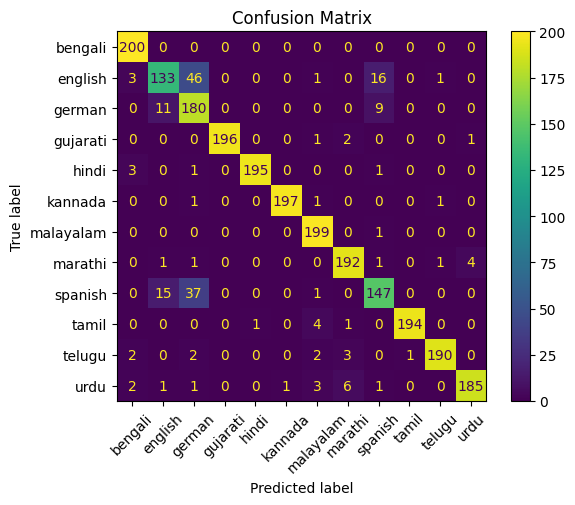

In [35]:
y_pred = model.predict(X_test)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [36]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.9563636363636364

In [37]:
print(classification_report(y_test_argmax, y_pred_argmax))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       200
           1       0.83      0.67      0.74       200
           2       0.67      0.90      0.77       200
           3       1.00      0.98      0.99       200
           4       0.99      0.97      0.98       200
           5       0.99      0.98      0.99       200
           6       0.94      0.99      0.97       200
           7       0.94      0.96      0.95       200
           8       0.84      0.73      0.78       200
           9       0.99      0.97      0.98       200
          10       0.98      0.95      0.97       200
          11       0.97      0.93      0.95       200

    accuracy                           0.92      2400
   macro avg       0.93      0.92      0.92      2400
weighted avg       0.93      0.92      0.92      2400



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


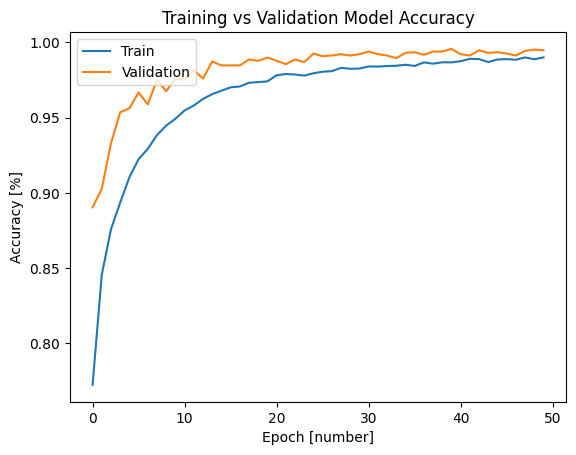

In [38]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Training vs Validation Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch [number]')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

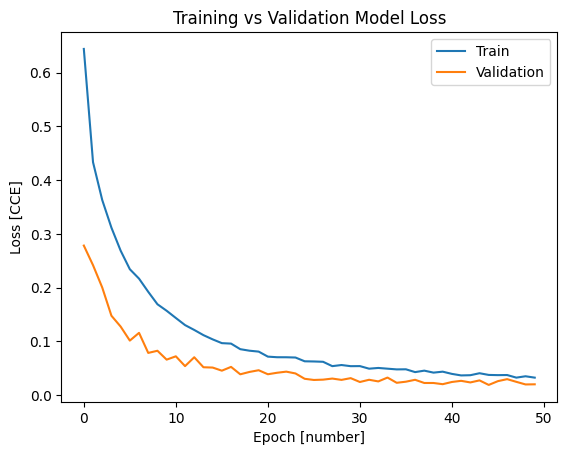

In [39]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training vs Validation Model Loss')
plt.ylabel('Loss [CCE]')
plt.xlabel('Epoch [number]')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [40]:
model = load_model('../data/models/language_detection_model_scaled_v1.keras')

print(model.evaluate(X_train_scaled, y_train))
print(model.evaluate(X_test_scaled, y_test))

1354/1354 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9988 - loss: 0.0064
[0.006823585368692875, 0.9985687732696533]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9906 - loss: 0.0387
[0.042757049202919006, 0.9891666769981384]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

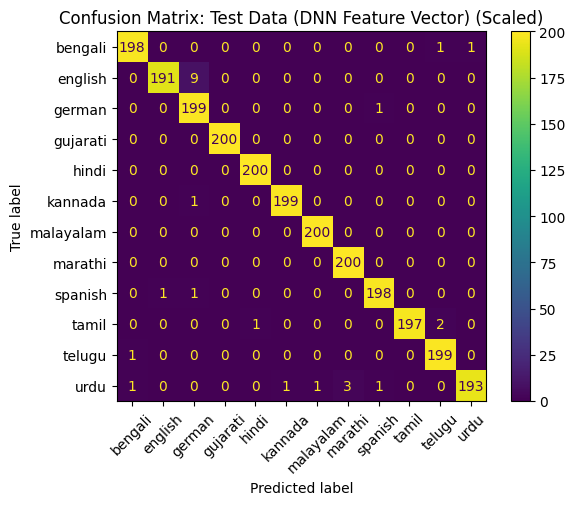

In [41]:
y_pred = model.predict(X_test_scaled)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix: Test Data (DNN Feature Vector) (Scaled)')
plt.xticks(rotation=45)

In [42]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.994090909090909

In [43]:
print(classification_report(y_test_argmax, y_pred_argmax))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       200
           1       0.99      0.95      0.97       200
           2       0.95      0.99      0.97       200
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200
           5       0.99      0.99      0.99       200
           6       1.00      1.00      1.00       200
           7       0.99      1.00      0.99       200
           8       0.99      0.99      0.99       200
           9       1.00      0.98      0.99       200
          10       0.99      0.99      0.99       200
          11       0.99      0.96      0.98       200

    accuracy                           0.99      2400
   macro avg       0.99      0.99      0.99      2400
weighted avg       0.99      0.99      0.99      2400



### CNN Model

In [46]:
mfcc_feature_dataframe = pd.read_parquet('../data/model_data/mfcc_feature_dataframe_v1.parquet')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    mfcc_feature_dataframe, mfcc_feature_dataframe['language_label'], stratify=mfcc_feature_dataframe['language_label'], test_size=0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, X_train['language_label'], stratify=X_train['language_label'], test_size=0.05, random_state=42)

X_train = X_train.drop(columns=['language_label']).reset_index(drop=True).values
X_val = X_val.drop(columns=['language_label']).reset_index(drop=True).values
X_test = X_test.drop(columns=['language_label']).reset_index(drop=True).values

print(f'\nTrain Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')

language_labels_cols = list(pd.get_dummies(y_train, dtype=np.int32).columns.values)

X_train, X_val, X_test = X_train, X_val, X_test = X_train.reshape(-1, 58, 431), X_val.reshape(-1, 58, 431), X_test.reshape(-1, 58, 431)

y_train, y_val, y_test = (pd.get_dummies(y_train.values, dtype=np.int32).values,
                          pd.get_dummies(y_val.values, dtype=np.int32).values,
                          pd.get_dummies(y_test.values, dtype=np.int32).values)

print(f'Train Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')
print(f'Target: Train Shape: {y_train.shape}, Validation Shape: {y_val.shape}, Test Shape: {y_test.shape}')


Train Shape: (10830, 24998), Validation Shape: (570, 24998), Test Shape: (600, 24998)
Train Shape: (10830, 58, 431), Validation Shape: (570, 58, 431), Test Shape: (600, 58, 431)
Target: Train Shape: (10830, 12), Validation Shape: (570, 12), Test Shape: (600, 12)


In [48]:
scaler_object = StandardScaler()

X_train_scaled = scaler_object.fit_transform(X_train.reshape(-1, 58 * 431)).reshape(-1, 58, 431)
X_val_scaled = scaler_object.fit_transform(X_val.reshape(-1, 58 * 431)).reshape(-1, 58, 431)
X_test_scaled = scaler_object.fit_transform(X_test.reshape(-1, 58 * 431)).reshape(-1, 58, 431)

In [49]:
X_train.shape

(10830, 58, 431)

In [50]:
X_train_scaled.shape

(10830, 58, 431)

In [51]:
def build_model_cnn(input_shape: tuple, output_shape: int) -> object:
    model = Sequential()

    model.add(Conv1D(filters=512, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=1024, kernel_size=3, activation='relu'))
    model.add(AveragePooling1D(pool_size=3, strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=2048, kernel_size=3, activation='relu'))
    model.add(AveragePooling1D(pool_size=3, strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=1024, kernel_size=3, activation='relu'))
    model.add(AveragePooling1D(pool_size=3, strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
    model.add(AveragePooling1D(pool_size=3, strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(Dropout(0.2))
    model.add(AveragePooling1D(pool_size=3, strides=1))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(output_shape, activation='softmax'))

    return model

In [52]:
model = build_model_cnn(input_shape=(58, 431), output_shape=y_train.shape[1])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_unscaled_v2.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
logger_callback = CSVLogger('../data/models/language_detection_model_unscaled_v2.log', separator=',', append=False)

model_history = model.fit(
    X_train, y_train, epochs=50, verbose=1, batch_size=32, callbacks=[checkpoint_callback, logger_callback],
    validation_data=(X_val, y_val))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 56, 512)        │       662,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 56, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 54, 1024)       │     1,573,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d               │ (None, 52, 1024)       │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 52, 1024)       │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 50, 2048)       │     6,293,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_1             │ (None, 48, 2048)       │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 48, 2048)       │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 46, 1024)       │     6,292,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_2             │ (None, 44, 1024)       │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 44, 1024)       │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 42, 512)        │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_3             │ (None, 40, 512)        │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 40, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 38, 256)        │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 38, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_4             │ (None, 36, 256)        │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 36, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 17,992,076 (68.63 MB)

 Trainable params: 17,981,324 (68.59 MB)

 Non-trainable params: 10,752 (42.00 KB)

None
Epoch 1/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 107s 307ms/step - accuracy: 0.4585 - loss: 1.7277 - val_accuracy: 0.1526 - val_loss: 4.4475
Epoch 2/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 105s 309ms/step - accuracy: 0.6671 - loss: 0.9368 - val_accuracy: 0.1930 - val_loss: 5.4327
Epoch 3/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 105s 311ms/step - accuracy: 0.7300 - loss: 0.7357 - val_accuracy: 0.1228 - val_loss: 7.5360
Epoch 4/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 104s 307ms/step - accuracy: 0.7636 - loss: 0.6401 - val_accuracy: 0.6246 - val_loss: 1.3529
Epoch 5/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 105s 309ms/step - accuracy: 0.7704 - loss: 0.6001 - val_accuracy: 0.5018 - val_loss: 2.1729
Epoch 6/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 104s 307ms/step - accuracy: 0.7898 - loss: 0.5591 - val_accuracy: 0.5088 - val_loss: 2.0036
Epoch 7/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 106s 312ms/step - accuracy: 0.8187 - loss: 0.4911 - val_accuracy: 0.1930 - val_loss: 7.5411
Epoch 8/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 103s 305ms/step - accuracy: 0.8

In [53]:
model = build_model_cnn(input_shape=(58, 431), output_shape=y_train.shape[1])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_scaled_v2.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
logger_callback = CSVLogger('../data/models/language_detection_model_scaled_v2.log', separator=',', append=False)

model_history = model.fit(
    X_train_scaled, y_train, epochs=50, verbose=1, batch_size=32, callbacks=[checkpoint_callback, logger_callback],
    validation_data=(X_val_scaled, y_val))

Epoch 1/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 107s 309ms/step - accuracy: 0.5402 - loss: 2.0754 - val_accuracy: 0.6263 - val_loss: 1.5871
Epoch 2/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 105s 310ms/step - accuracy: 0.7362 - loss: 0.7831 - val_accuracy: 0.7193 - val_loss: 1.0661
Epoch 3/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 104s 308ms/step - accuracy: 0.8063 - loss: 0.5529 - val_accuracy: 0.7526 - val_loss: 0.8409
Epoch 4/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 104s 307ms/step - accuracy: 0.8384 - loss: 0.4389 - val_accuracy: 0.8105 - val_loss: 0.6675
Epoch 5/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 104s 305ms/step - accuracy: 0.8726 - loss: 0.3413 - val_accuracy: 0.7982 - val_loss: 0.7171
Epoch 6/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 105s 309ms/step - accuracy: 0.8864 - loss: 0.2912 - val_accuracy: 0.8193 - val_loss: 0.6427
Epoch 7/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 105s 310ms/step - accuracy: 0.9041 - loss: 0.2428 - val_accuracy: 0.7947 - val_loss: 0.8547
Epoch 8/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 105s 309ms/step - accuracy: 0.9071 -

In [54]:
model = load_model('../data/models/language_detection_model_unscaled_v2.keras')

print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

339/339 ━━━━━━━━━━━━━━━━━━━━ 35s 104ms/step - accuracy: 0.9113 - loss: 0.2637
[0.27707573771476746, 0.905724823474884]
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.8157 - loss: 0.7647
[0.8007621765136719, 0.8033333420753479]


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

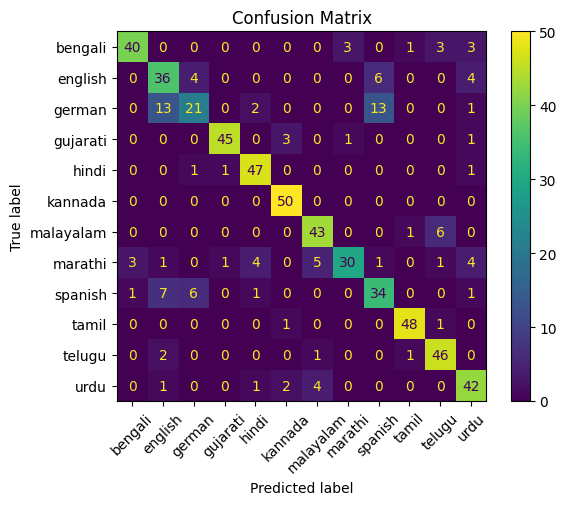

In [55]:
y_pred = model.predict(X_test)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [56]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.8927272727272726

In [57]:
print(classification_report(y_test_argmax, y_pred_argmax))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        50
           1       0.60      0.72      0.65        50
           2       0.66      0.42      0.51        50
           3       0.96      0.90      0.93        50
           4       0.85      0.94      0.90        50
           5       0.89      1.00      0.94        50
           6       0.81      0.86      0.83        50
           7       0.88      0.60      0.71        50
           8       0.63      0.68      0.65        50
           9       0.94      0.96      0.95        50
          10       0.81      0.92      0.86        50
          11       0.74      0.84      0.79        50

    accuracy                           0.80       600
   macro avg       0.81      0.80      0.80       600
weighted avg       0.81      0.80      0.80       600



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


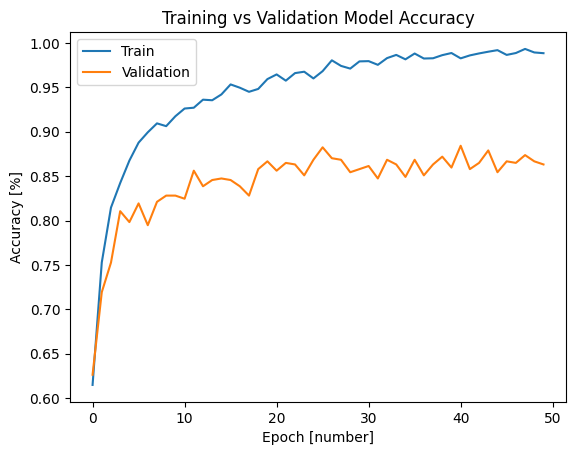

In [58]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Training vs Validation Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch [number]')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

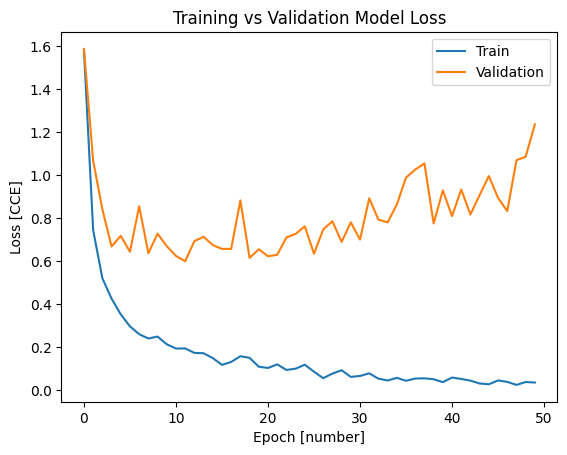

In [59]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training vs Validation Model Loss')
plt.ylabel('Loss [CCE]')
plt.xlabel('Epoch [number]')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [60]:
model = load_model('../data/models/language_detection_model_scaled_v2.keras')

print(model.evaluate(X_train_scaled, y_train))
print(model.evaluate(X_test_scaled, y_test))

339/339 ━━━━━━━━━━━━━━━━━━━━ 35s 104ms/step - accuracy: 0.9904 - loss: 0.0299
[0.03372165933251381, 0.990304708480835]
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.8764 - loss: 0.7499
[0.7524860501289368, 0.875]


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

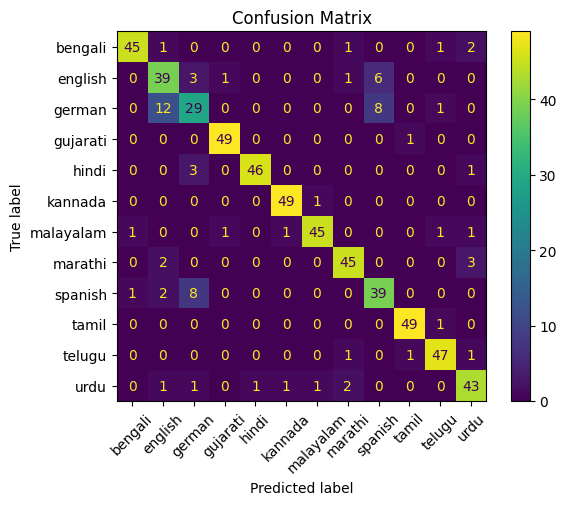

In [61]:
y_pred = model.predict(X_test_scaled)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [62]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.9318181818181818

In [63]:
print(classification_report(y_test_argmax, y_pred_argmax))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.68      0.78      0.73        50
           2       0.66      0.58      0.62        50
           3       0.96      0.98      0.97        50
           4       0.98      0.92      0.95        50
           5       0.96      0.98      0.97        50
           6       0.96      0.90      0.93        50
           7       0.90      0.90      0.90        50
           8       0.74      0.78      0.76        50
           9       0.96      0.98      0.97        50
          10       0.92      0.94      0.93        50
          11       0.84      0.86      0.85        50

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


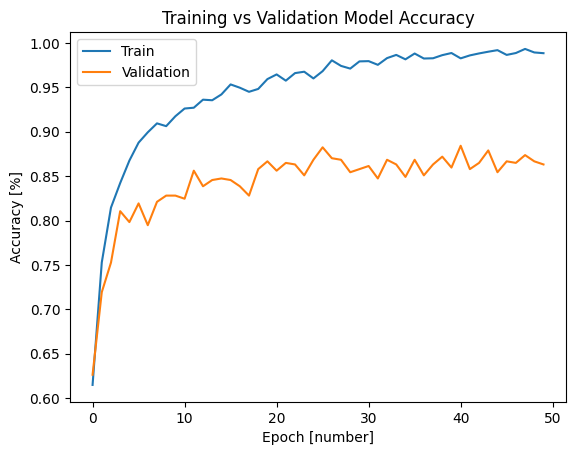

In [64]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Training vs Validation Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch [number]')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

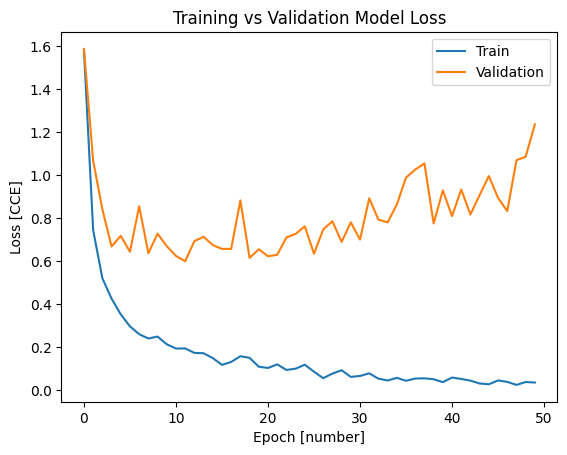

In [65]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training vs Validation Model Loss')
plt.ylabel('Loss [CCE]')
plt.xlabel('Epoch [number]')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### CNN Spectogram Model

In [66]:
spectogram_images = image_dataset_from_directory("../data/model_data/spectrogram_images", labels="inferred", image_size=(128, 128), batch_size=None, shuffle=True)
class_names = spectogram_images.class_names

test_val_records = 150

test_images = spectogram_images.take(test_val_records)
train_images = spectogram_images.skip(test_val_records)

val_images = train_images.take(test_val_records)
train_images = train_images.skip(test_val_records)

size = (128, 128)

train_data = train_images.map(lambda x, y: (tf.image.resize(x, size), y))
val_data = val_images.map(lambda x, y: (tf.image.resize(x, size), y))
test_data = test_images.map(lambda x, y: (tf.image.resize(x, size), y))

print(f'Train Data Size: {len([i for i, v in enumerate(train_data.as_numpy_iterator())])}')
print(f'Validation Data Size: {len([i for i, v in enumerate(val_data.as_numpy_iterator())])}')
print(f'Test Data Size: {len([i for i, v in enumerate(test_data.as_numpy_iterator())])}')

Found 2400 files belonging to 12 classes.
Train Data Size: 2100
Validation Data Size: 150
Test Data Size: 150


In [67]:
train_image_data = np.array([images for (images, _) in train_data.as_numpy_iterator()])
val_image_data = np.array([images for (images, _) in val_data.as_numpy_iterator()])
test_image_data = np.array([images for (images, _) in test_data.as_numpy_iterator()])

train_labels = np.array([labels for (_, labels) in train_data.as_numpy_iterator()])
val_labels = np.array([labels for (_, labels) in val_data.as_numpy_iterator()])
test_labels = np.array([labels for (_, labels) in test_data.as_numpy_iterator()])

train_image_data, train_labels = np.concatenate(train_image_data, axis=0).reshape(-1, 128, 128, 3), pd.get_dummies(train_labels, dtype=np.int32).values
val_image_data, val_labels = np.concatenate(val_image_data, axis=0).reshape(-1, 128, 128, 3), pd.get_dummies(val_labels, dtype=np.int32).values
test_image_data, test_labels = np.concatenate(test_image_data, axis=0).reshape(-1, 128, 128, 3), pd.get_dummies(test_labels, dtype=np.int32).values

'german'

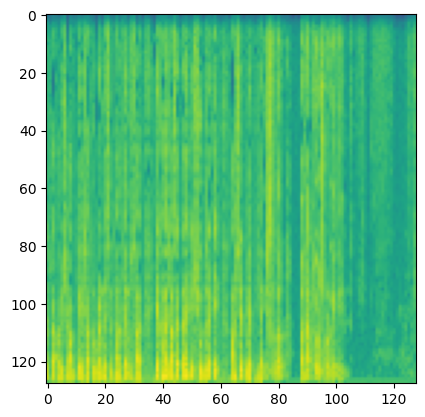

In [68]:
plt.imshow(np.array(train_image_data[0]).astype('uint8'))
class_names[np.argmax(train_labels[0])]

In [69]:
def build_model_cnn_spectrogram(output_shape: int) -> object:
    model = Sequential()

    model.add(Input(shape=(128, 128, 3), name='input_layer'))
    model.add(Conv2D(256, (5, 5), activation='relu', name='conv2d_1'))
    model.add(AveragePooling2D(pool_size=(3, 3), strides=2, name='avgpool2d_1'))
    model.add(BatchNormalization(name='batchnorm_1'))
    model.add(Conv2D(512, (5, 5), activation='relu', name='conv2d_2'))
    model.add(AveragePooling2D(pool_size=(3, 3), strides=2, name='avgpool2d_2'))
    model.add(BatchNormalization(name='batchnorm_2'))
    model.add(Conv2D(256, (5, 5), activation='relu', name='conv2d_6'))
    model.add(AveragePooling2D(pool_size=(3, 3), strides=1, name='avgpool2d_6'))
    model.add(BatchNormalization(name='batchnorm_6'))
    model.add(Dropout(0.2, name='dropout_1'))
    model.add(Flatten(name='flatten_1'))
    model.add(Dense(128, activation='relu', name='dense_1'))
    model.add(Dense(output_shape, activation='softmax', name='output_dense_1'))

    return model

In [71]:
model = build_model_cnn_spectrogram(output_shape=12)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

checkpoint_callback = ModelCheckpoint('../data/models/language_detection_model_raw_v3.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
logger_callback = CSVLogger('../data/models/language_detection_model_raw_v3.log', separator=',', append=False)

model_history = model.fit(
    train_image_data, train_labels, epochs=5, verbose=1, batch_size=32, callbacks=[checkpoint_callback, logger_callback],
    validation_data=(val_image_data, val_labels))

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 256)  │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avgpool2d_1 (AveragePooling2D)  │ (None, 61, 61, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_1                     │ (None, 61, 61, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 57, 57, 512)    │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avgpool2d_2 (AveragePooling2D)  │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_2                     │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 256)    │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avgpool2d_6 (AveragePooling2D)  │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_6                     │ (None, 22, 22, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 123904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │    15,859,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense_1 (Dense)          │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,439,308 (85.60 MB)

 Trainable params: 22,437,260 (85.59 MB)

 Non-trainable params: 2,048 (8.00 KB)

None
Epoch 1/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.0795 - loss: 27.6696 - val_accuracy: 0.1067 - val_loss: 837.8231
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.0851 - loss: 3.0611 - val_accuracy: 0.1200 - val_loss: 58.3640
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.0996 - loss: 2.8272 - val_accuracy: 0.1200 - val_loss: 3.3136
Epoch 4/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.0882 - loss: 2.5010 - val_accuracy: 0.0667 - val_loss: 2.4766
Epoch 5/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.0939 - loss: 2.4963 - val_accuracy: 0.0800 - val_loss: 2.5048


In [72]:
model = load_model('../data/models/language_detection_model_raw_v3.keras')

print(model.evaluate(train_image_data, train_labels))
print(model.evaluate(test_image_data, test_labels))

66/66 ━━━━━━━━━━━━━━━━━━━━ 55s 828ms/step - accuracy: 0.0865 - loss: 64.1646
[64.07225036621094, 0.0890476182103157]
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 766ms/step - accuracy: 0.0377 - loss: 60.7732
[63.74717330932617, 0.046666666865348816]


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 791ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        10
           4       0.04      0.40      0.07        10
           5       1.00      0.07      0.12        15
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        17
           8       0.12      0.18      0.14        11
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00        15

    accuracy                           0.05       150
   macro avg       0.10      0.05      0.03       150
weighted avg       0.11      0.05      0.03       150



<Figure size 800x600 with 0 Axes>

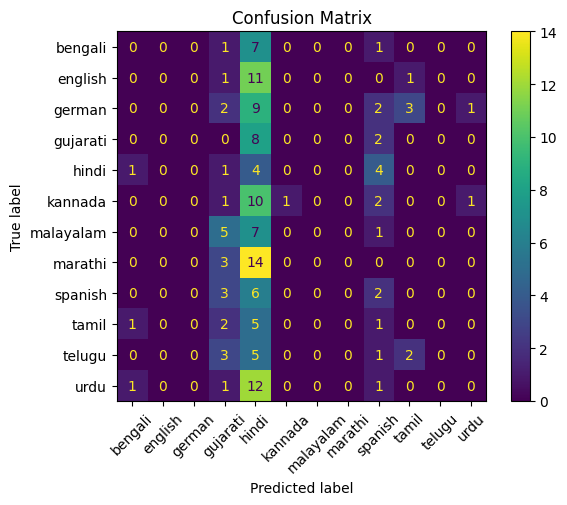

In [73]:
y_pred = model.predict(test_image_data)

y_test_argmax = [np.argmax(test_labels[i,:]) for i in range(0, len(test_labels))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0, len(test_labels))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=class_names)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

print(classification_report(y_test_argmax, y_pred_argmax))

In [74]:
label_binarizer = LabelBinarizer().fit(y_test_argmax)

y_test_lb = label_binarizer.transform(y_test_argmax)
y_pred_lb = label_binarizer.transform(y_pred_argmax)

roc_auc_score(list(y_test_lb), list(y_pred_lb), multi_class='ovr', average='macro')

0.4844255121523733

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


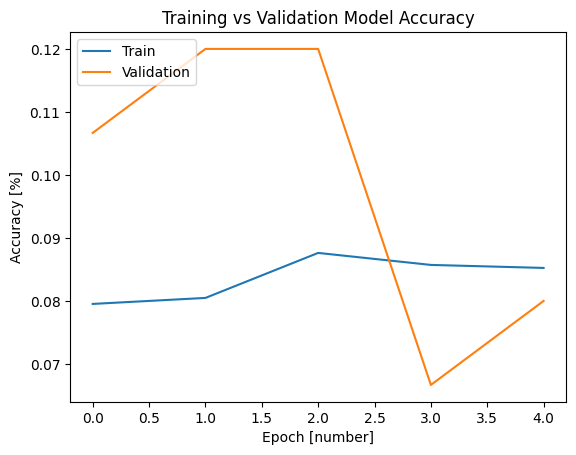

In [75]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Training vs Validation Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch [number]')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

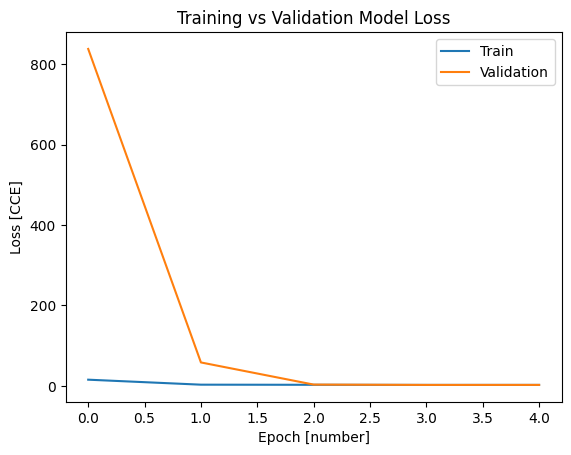

In [76]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training vs Validation Model Loss')
plt.ylabel('Loss [CCE]')
plt.xlabel('Epoch [number]')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### Ensembling Methods

In [77]:
def ensemble_v1(*probabilities: np.ndarray) -> tuple:
    probabilities = np.concatenate(probabilities, axis=0).reshape(-1, probabilities[0].shape[0], probabilities[0].shape[1])

    ind_prob_prod = np.prod(probabilities, axis=0)

    argmax_prob_label = np.argmax(ind_prob_prod, axis=1)
    max_prob = np.max(ind_prob_prod, axis=1)

    return argmax_prob_label, max_prob

def ensemble_v2(*probabilities: np.ndarray) -> tuple:
    probabilities = np.concatenate(probabilities, axis=0).reshape(-1, probabilities[0].shape[0], probabilities[0].shape[1])
    ensemble_prob_list = []

    top_3_labels = np.argsort(probabilities, axis=2)[:, :, -3:][:, :, ::-1]
    top_3_prob = np.sort(-np.partition(-probabilities, 3, axis=2)[:, :, :3], axis=2)[:, :, ::-1]

    for idx in range(top_3_labels.shape[1]):
        record_labels = top_3_labels[:, idx, :]
        record_probabilities = top_3_prob[:, idx, :]

        unique_labels, label_counts = np.unique(record_labels.flatten(), return_counts=True)

        max_count = np.max(label_counts)
        most_occuring_labels = unique_labels[label_counts == max_count]

        combined_prob_dict = {}

        for label in most_occuring_labels:
            label_indices = np.argwhere(record_labels == label)
            combined_prob = np.prod(record_probabilities[label_indices[:, 0], label_indices[:, 1]])
            combined_prob_dict[label] = combined_prob

        ensemble_prob_list.append(combined_prob_dict)

    max_prob_labels_with_prob = []

    for record_probs_dict in ensemble_prob_list:
        max_prob_label = max(record_probs_dict, key=record_probs_dict.get)
        max_prob = record_probs_dict[max_prob_label]

        max_prob_labels_with_prob.append({'label': max_prob_label, 'probability': max_prob})

    labels = [record['label'] for record in max_prob_labels_with_prob]
    probs = [record['probability'] for record in max_prob_labels_with_prob]

    return labels, probs

In [78]:
mfcc_feature_mean_dataframe = pd.read_parquet('../data/model_data/mfcc_feature_mean_dataframe_v1.parquet')

X_train, X_test, y_train, y_test = train_test_split(mfcc_feature_mean_dataframe, mfcc_feature_mean_dataframe['language_label'], stratify=mfcc_feature_mean_dataframe['language_label'], test_size=0.05, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, X_train['language_label'], stratify=X_train['language_label'], test_size=0.05, random_state=0)

X_train = X_train.drop(columns=['language_label']).reset_index(drop=True).values
X_val = X_val.drop(columns=['language_label']).reset_index(drop=True).values
X_test = X_test.drop(columns=['language_label']).reset_index(drop=True).values

print(f'\nTrain Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')

language_labels_cols = list(pd.get_dummies(y_train, dtype=np.int32).columns.values)

X_train, X_val, X_test = X_train.reshape(-1, 58, 1), X_val.reshape(-1, 58, 1), X_test.reshape(-1, 58, 1)

y_train, y_val, y_test = (pd.get_dummies(y_train.values, dtype=np.int32).values,
                          pd.get_dummies(y_val.values, dtype=np.int32).values,
                          pd.get_dummies(y_test.values, dtype=np.int32).values)

print(f'Train Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')
print(f'Target: Train Shape: {y_train.shape}, Validation Shape: {y_val.shape}, Test Shape: {y_test.shape}')


Train Shape: (43320, 58), Validation Shape: (2280, 58), Test Shape: (2400, 58)
Train Shape: (43320, 58, 1), Validation Shape: (2280, 58, 1), Test Shape: (2400, 58, 1)
Target: Train Shape: (43320, 12), Validation Shape: (2280, 12), Test Shape: (2400, 12)


In [79]:
scaler_object = StandardScaler()

X_train_scaled = scaler_object.fit_transform(X_train.reshape(-1, 58)).reshape(-1, 58, 1)
X_val_scaled = scaler_object.fit_transform(X_val.reshape(-1, 58)).reshape(-1, 58, 1)
X_test_scaled = scaler_object.fit_transform(X_test.reshape(-1, 58)).reshape(-1, 58, 1)

In [80]:
model = load_model('../data/models/language_detection_model_unscaled_v1.keras')
print(model.evaluate(X_test, y_test))

y_pred_model_1 = model.predict(X_test)[:600, :]

model = load_model('../data/models/language_detection_model_scaled_v1.keras')
print(model.evaluate(X_test_scaled, y_test))

y_pred_model_2 = model.predict(X_test_scaled)[:600, :]

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9336 - loss: 0.2080
[0.18751901388168335, 0.9391666650772095]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.0072
[0.008181278593838215, 0.9987499713897705]
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [81]:
mfcc_feature_dataframe = pd.read_parquet('../data/model_data/mfcc_feature_dataframe_v1.parquet')

X_train, X_test, y_train, y_test = train_test_split(
    mfcc_feature_dataframe, mfcc_feature_dataframe['language_label'], stratify=mfcc_feature_dataframe['language_label'], test_size=0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, X_train['language_label'], stratify=X_train['language_label'], test_size=0.05, random_state=42)

X_train = X_train.drop(columns=['language_label']).reset_index(drop=True).values
X_val = X_val.drop(columns=['language_label']).reset_index(drop=True).values
X_test = X_test.drop(columns=['language_label']).reset_index(drop=True).values

print(f'\nTrain Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')

language_labels_cols = list(pd.get_dummies(y_train, dtype=np.int32).columns.values)

X_train, X_val, X_test = X_train, X_val, X_test = X_train.reshape(-1, 58, 431), X_val.reshape(-1, 58, 431), X_test.reshape(-1, 58, 431)

y_train, y_val, y_test = (pd.get_dummies(y_train.values, dtype=np.int32).values,
                          pd.get_dummies(y_val.values, dtype=np.int32).values,
                          pd.get_dummies(y_test.values, dtype=np.int32).values)

print(f'Train Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}')
print(f'Target: Train Shape: {y_train.shape}, Validation Shape: {y_val.shape}, Test Shape: {y_test.shape}')


Train Shape: (10830, 24998), Validation Shape: (570, 24998), Test Shape: (600, 24998)
Train Shape: (10830, 58, 431), Validation Shape: (570, 58, 431), Test Shape: (600, 58, 431)
Target: Train Shape: (10830, 12), Validation Shape: (570, 12), Test Shape: (600, 12)


In [82]:
scaler_object = StandardScaler()

X_train_scaled = scaler_object.fit_transform(X_train.reshape(-1, 58 * 431)).reshape(-1, 58, 431)
X_val_scaled = scaler_object.fit_transform(X_val.reshape(-1, 58 * 431)).reshape(-1, 58, 431)
X_test_scaled = scaler_object.fit_transform(X_test.reshape(-1, 58 * 431)).reshape(-1, 58, 431)

In [83]:
model = load_model('../data/models/language_detection_model_unscaled_v2.keras')
print(model.evaluate(X_test, y_test))

y_pred_model_3 = model.predict(X_test)[:600, :]

model = load_model('../data/models/language_detection_model_scaled_v2.keras')
print(model.evaluate(X_test_scaled, y_test))

y_pred_model_4 = model.predict(X_test_scaled)[:600, :]

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.8157 - loss: 0.7647
[0.8007621765136719, 0.8033333420753479]
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.8764 - loss: 0.7499
[0.7524860501289368, 0.875]
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step


In [84]:
labels_v1, prob_v1 = ensemble_v1(y_pred_model_1, y_pred_model_2, y_pred_model_3, y_pred_model_4)
labels_v2, prob_v2 = ensemble_v2(y_pred_model_1, y_pred_model_2, y_pred_model_3, y_pred_model_4)

0.8316666666666667


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

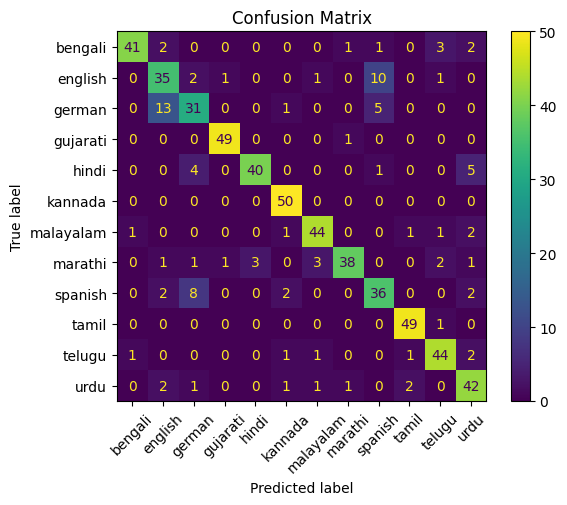

In [85]:
y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = list(labels_v1)

print(accuracy_score(y_test_argmax, y_pred_argmax))

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)